# Pymaceuticals Inc.
---

### Analysis

- Pypharma Analysis.
The bar graph showed the Drug Regimen Capomulin has the maximum mice number  and Propriva has the smaller mice number .By removing duplicates the total number of mice is 248. The total count of mice by gender also showed that 124 female mice and 125 male mice.
The correlation between mouse weight, and average tumor volume is 0.84. It is a strong positive correlation, when the mouse weight increases the average tumor volume also increases.
The regression analysis helped to understand how much the average tumor volume (dependent variable) will change when weight of mice change(independent variables). The R-squared value is 0.70, which means 70% the model fit the data, wich is fairely good to predict the data from the model. Higher R-squared values represent smaller differences between the observed data, and the fitted value. 70% the model explains all of the variation in the response variable around its mean.
From the selected treatments Capomulin and Ramicane reduces the size of tumors better.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
# mouse_metadata.info()
# study_results.info()

# Combine the data into a single DataFrame
combined_mouse_study_results=pd.merge(
    study_results,mouse_metadata,how="left",on="Mouse ID")

# Display the data table for preview
combined_mouse_study_results

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
total_mice=mouse_metadata["Mouse ID"].count()
total_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

combined_mouse_study_results.loc[combined_mouse_study_results.duplicated(subset=["Mouse ID","Timepoint"]),"Mouse ID"].unique()

###Identify all duplicated rows
###Find all duplicated rows
### Return the Mouse_ID's associated with the duplicated rows
# combined_mouse_study_results.loc[combined_mouse_study_results.duplicated(subset=["Mouse ID","Timepoint"]),'Mouse ID'].unique()

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_df = combined_mouse_study_results.duplicated(
           subset=["Mouse ID","Timepoint"])

###Find all duplicated rows
duplicated_data = combined_mouse_study_results.loc[duplicated_df, :]
duplicated_data




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df=combined_mouse_study_results.drop_duplicates(subset=["Mouse ID","Timepoint"],keep=False)


In [7]:
# Checking the number of mice in the clean DataFrame.
Total_mice=combined_mouse_study_results["Mouse ID"].count()
Total_mice

1893

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
grouped_df=combined_mouse_study_results.groupby("Drug Regimen")
tumor_volume_mean=grouped_df["Tumor Volume (mm3)"].mean()
tumor_volume_median=grouped_df["Tumor Volume (mm3)"].median()
tumor_volume_variance=grouped_df["Tumor Volume (mm3)"].var()
tumor_volume_Std=grouped_df["Tumor Volume (mm3)"].std()
tumor_volume_sem=grouped_df["Tumor Volume (mm3)"].sem()
statistics_df=pd.DataFrame({
                            "Mean Tumor Volume":tumor_volume_mean,
                            "Median Tumor Volume":tumor_volume_median,
                            "Tumor Volume Variance":tumor_volume_variance,
                            "Tumor Volume Std. Dev.":tumor_volume_Std,
                            "Tumor Volume Std. Err.":tumor_volume_sem

                            })
statistics_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


aggregation =grouped_df.aggregate({"Tumor Volume (mm3)":["mean","median","var","std","sem"]})


## Bar and Pie Charts

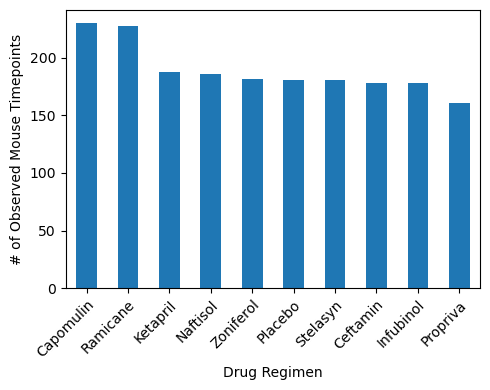

In [10]:
#Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas

mouce_ID_grouped = combined_mouse_study_results.groupby("Drug Regimen")
                                                              
timepoints_per_regimen=mouce_ID_grouped["Mouse ID"].count().sort_values(ascending=False)

figure_bar=timepoints_per_regimen.plot(kind="bar",figsize=(5,4),fontsize=10)
xticklabels=timepoints_per_regimen.index
figure_bar.set_xticklabels(xticklabels,rotation=45,rotation_mode="anchor",ha="right",wrap=True)
plt.ylabel("# of Observed Mouse Timepoints")
plt.tight_layout()

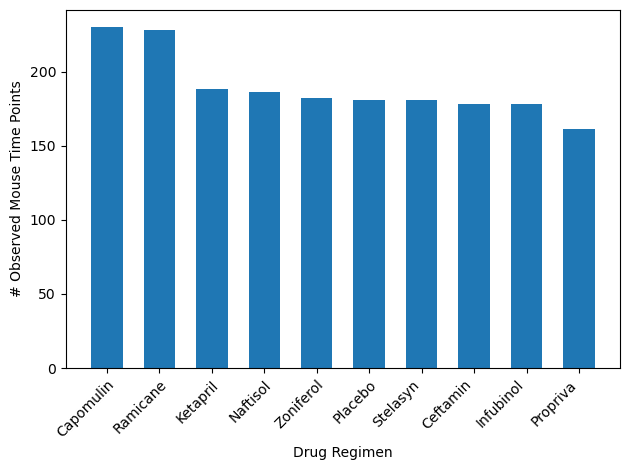

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

list_regimens=timepoints_per_regimen.index
total_rows=timepoints_per_regimen.values

plt.xticks(rotation=45,wrap=True,ha="right",rotation_mode="anchor",fontsize=10)
plt.bar(list_regimens,total_rows,align="center",width = 0.6)
plt.xlabel("Drug Regimen")
plt.ylabel("# Observed Mouse Time Points")
plt.tight_layout()
plt.show()



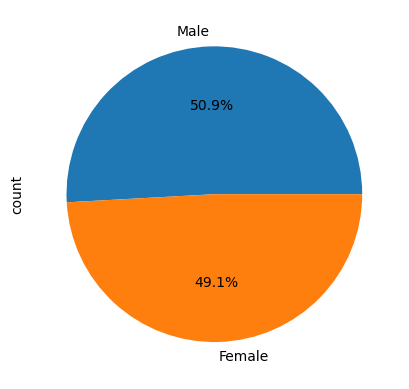

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_distribution =cleaned_df["Sex"].value_counts()

label=gender_distribution.index
pies=gender_distribution.values
gender_distribution.plot(kind="pie",labels=label,y=pies,
                          autopct="%1.1f%%")

plt.show()

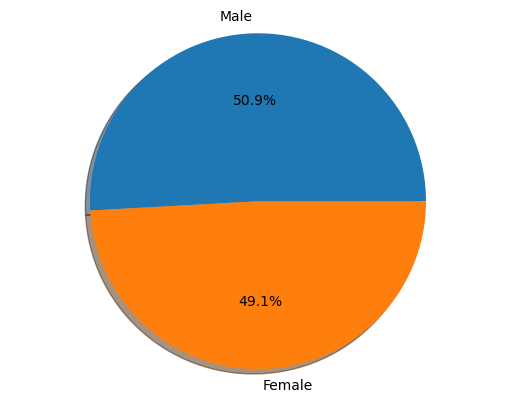

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_count=cleaned_df["Sex"].value_counts()
gender_count
label=gender_count.index
pies=gender_count.values
plt.pie(x=pies,labels=label,shadow=True,startangle=360,autopct="%1.1f%%")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
treatment_regimens_df=cleaned_df.loc[cleaned_df["Drug Regimen"].isin(treatment_regimens)]
treatment_regimens_df

# Start by getting the last (greatest) timepoint for each mouse

max_timepoint=treatment_regimens_df.groupby("Mouse ID")["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_tumorvolume_df=pd.merge(max_timepoint,cleaned_df,on=["Mouse ID","Timepoint"],how="left")
last_tumorvolume_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [15]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_regimens=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumor_vol=last_tumorvolume_df["Tumor Volume (mm3)"]
quartiles=tumor_vol.quantile([.25,.5,.75])
lower_quartile=quartiles[.25]
upper_quartile=quartiles[.75]
iqr=upper_quartile-lower_quartile

    # Locate the rows which contain mice on each drug and get the tumor volumes

for drug in treatment_regimens:
    final_tumor_volume=cleaned_df.loc[cleaned_df["Drug Regimen"]==drug,["Tumor Volume (mm3)"]]
    tumor_volume.append(final_tumor_volume.values.flatten())
   

    # add subset 

    
    # Determine outliers using upper and lower bounds
    lower_bound=lower_quartile-(1.5*iqr)
    upper_bound=upper_quartile-(1.5*iqr)
    
print(f"The lower quartile of treatment is: {lower_quartile}")
print(f"The upper quartile of temperatures is: {upper_quartile}")
print(f"The interquartile range of temperatures is: {iqr}")
print(f"The the median of temperatures is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of treatment is: 37.1877438025
The upper quartile of temperatures is: 59.930261755
The interquartile range of temperatures is: 22.742517952499995
The the median of temperatures is: 45.0 
Values below 3.0739668737500097 could be outliers.
Values above 25.816484826250004 could be outliers.


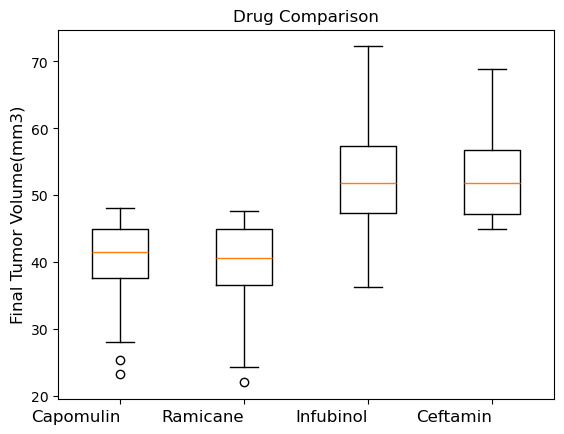

In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.set_title("Drug Comparison")
ax.set_ylabel("Final Tumor Volume(mm3)",fontsize=12)

ax.boxplot(tumor_volume)
ax.set_xticklabels(treatment_regimens, rotation=360, ha="right",fontsize=12)
plt.show()

## Line and Scatter Plots

l897


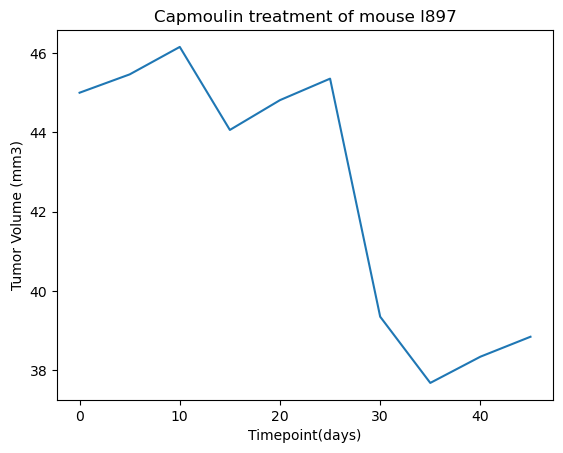

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_ID = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin","Mouse ID"].sample(n=1).values[0]
print(mouse_ID)
chosen_mouse_df = cleaned_df.loc[cleaned_df["Mouse ID"]==mouse_ID, ["Tumor Volume (mm3)","Timepoint"]]
y=chosen_mouse_df["Tumor Volume (mm3)"].values
x=chosen_mouse_df["Timepoint"].values
plt.plot(x,y)
plt.xlabel("Timepoint(days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capmoulin treatment of mouse {mouse_ID}")
plt.show()

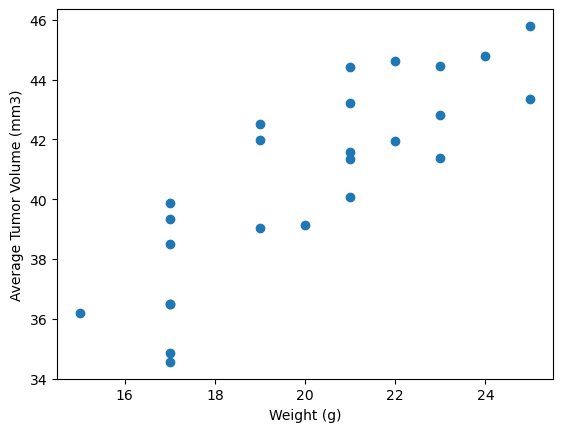

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_df = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin",:]
capomulin_avg_vol = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
capomulin_avg_weight = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
x_values = capomulin_avg_weight.values
y_values = capomulin_avg_vol.values

plt.scatter(x_values, y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


## Correlation and Regression

The corelation coeficient of average mouse weight and average tumor volume observed is 0.84
The rsquared_value is 0.71


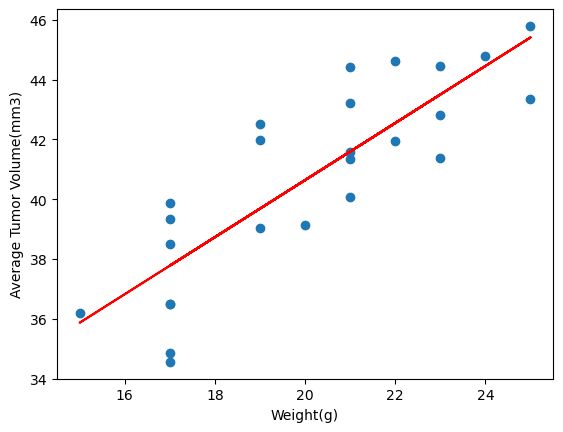

In [26]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corelation=st.pearsonr(x_values,y_values)
rsquared_value=corelation[0]**2
rsquared_value
print(f"The corelation coeficient of average mouse weight and average tumor volume observed is {round(corelation[0],2)}")
print(f"The rsquared_value is {round(rsquared_value,2)}")
(slope,intercept,rvalue,pvalue,stderr)=st.linregress(x_values,y_values)
regress_values=y=slope*x_values+intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.ylabel("Average Tumor Volume(mm3)")
plt.xlabel("Weight(g)")
plt.show()
